In [1]:
# Cleanup of the first block of the BIOGRID file while preserving compatibility for merging.
# A chunk by chunk cleanup will be performed to avoid memory problems.
# File path size 701MB

# Limpieza del primer bloque del archivo BIOGRID conservanndo compatibilidad para fusion
# Se realizara una limpieza por chunk para evitar problemas de memoria.
# El tamano del archivo es de 701MB

import pandas as pd

# Original and output file path
# Ruta del archivo original y de salida
input_file = r'C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/cleaned_block_1.csv'
output_file = r'C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/cleaned_block_1_validated.csv'

# Chunk size (number of rows per chunk)
# Tamaño del chunk (número de filas por chunk)
chunk_size = 100000

# Create an empty file to save the results
# Crear un archivo vacío para guardar los resultados
with open(output_file, 'w') as f:
    pass

# Function to process each chunk
# Función para procesar cada chunk
def process_chunk(chunk):
    
    # Step 1: Elimination of duplicates within the chunk
    # Paso 1: Eliminación de duplicados dentro del chunk
    chunk.drop_duplicates(inplace=True)

    # Step 2: Removal of irrelevant columns
    # Paso 2: Eliminación de columnas irrelevantes
    # Estas columnas deberían ser ajustadas según el análisis
    columns_to_drop = ['Column1', 'Column2']  # Sustituir con nombres reales si se identifican columnas irrelevantes
    chunk.drop(columns=columns_to_drop, inplace=True, errors='ignore')

    # Step 3: Treatment of null values
    # Paso 3: Tratamiento de valores nulos
    # If a column has more than 50% of null values, delete it
    # Si una columna tiene más del 50% de valores nulos, eliminarla
    null_threshold = 0.5
    cols_to_remove = chunk.columns[chunk.isnull().mean() > null_threshold]
    chunk.drop(columns=cols_to_remove, inplace=True)
    # For the other columns, fill in the median if it is numeric.
    # Para las demás columnas, rellenar con la mediana si es numérica
    for column in chunk.select_dtypes(include=['float64', 'int64']):
        if chunk[column].isnull().sum() > 0:
            median_value = chunk[column].median()
            chunk[column].fillna(median_value, inplace=True)
    
    # Step 4: Elimination of special characters
    # Paso 4: Eliminación de caracteres especiales
    # Aplicado solo a columnas de texto / # Applied only to text columns
    text_columns = chunk.select_dtypes(include=['object']).columns
    for column in text_columns:
        chunk[column] = chunk[column].str.replace(r'[^\w\s]', '', regex=True)
    
    # Step 5: Conversion from scientific notation to full numerical form
    # Paso 5: Conversión de notación científica a forma numérica completa
    for column in chunk.select_dtypes(include=['float64', 'int64']):
        chunk[column] = chunk[column].apply(lambda x: f'{x:.6f}' if isinstance(x, (int, float)) else x)

    return chunk

# Process the file in chunks
# Procesar el archivo en chunks
print("Procesando el archivo por chunks...")
chunk_iter = pd.read_csv(input_file, chunksize=chunk_size)

for i, chunk in enumerate(chunk_iter):
    print(f"Procesando chunk {i + 1}...")
    processed_chunk = process_chunk(chunk)

    # Save the processed chunk in the output file
    # Guardar el chunk procesado en el archivo de salida
    if i == 0:
        processed_chunk.to_csv(output_file, index=False, mode='w')  # Crear el archivo con encabezados
    else:
        processed_chunk.to_csv(output_file, index=False, mode='a', header=False)  # Append sin encabezados

print(f"Archivo limpio guardado en {output_file}")



C:\Users\kentv\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\kentv\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Procesando el archivo por chunks...
Procesando chunk 1...


C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chunk[column].fillna(median_value, inplace=True)
C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:72: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(chunk_iter):


Procesando chunk 2...


C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chunk[column].fillna(median_value, inplace=True)
C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

Procesando chunk 3...


C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chunk[column].fillna(median_value, inplace=True)
C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

Procesando chunk 4...


C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chunk[column].fillna(median_value, inplace=True)
C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

Procesando chunk 5...
Procesando chunk 6...


C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chunk[column].fillna(median_value, inplace=True)


Procesando chunk 7...
Procesando chunk 8...


C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chunk[column].fillna(median_value, inplace=True)


Procesando chunk 9...
Procesando chunk 10...
Procesando chunk 11...
Procesando chunk 12...
Procesando chunk 13...
Procesando chunk 14...


C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:72: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(chunk_iter):


Procesando chunk 15...
Procesando chunk 16...
Procesando chunk 17...
Procesando chunk 18...


C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:72: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(chunk_iter):


Procesando chunk 19...
Procesando chunk 20...
Procesando chunk 21...
Procesando chunk 22...


C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:72: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(chunk_iter):


Procesando chunk 23...


C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:72: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(chunk_iter):


Procesando chunk 24...
Procesando chunk 25...


C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:72: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(chunk_iter):


Procesando chunk 26...


C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:72: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(chunk_iter):


Procesando chunk 27...


C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chunk[column].fillna(median_value, inplace=True)


Procesando chunk 28...


C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chunk[column].fillna(median_value, inplace=True)
C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:72: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(chunk_iter):


Procesando chunk 29...
Procesando chunk 30...


C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:72: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(chunk_iter):


Procesando chunk 31...


C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:72: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(chunk_iter):


Procesando chunk 32...


C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:72: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(chunk_iter):


Procesando chunk 33...


C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:72: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(chunk_iter):


Procesando chunk 34...


C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:72: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(chunk_iter):


Procesando chunk 35...


C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:72: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(chunk_iter):


Procesando chunk 36...
Procesando chunk 37...


C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:72: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(chunk_iter):


Procesando chunk 38...
Procesando chunk 39...


C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chunk[column].fillna(median_value, inplace=True)
C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:72: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(chunk_iter):


Procesando chunk 40...


C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:72: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(chunk_iter):


Procesando chunk 41...


C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:72: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(chunk_iter):


Procesando chunk 42...


C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:72: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(chunk_iter):


Procesando chunk 43...


C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:72: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(chunk_iter):


Procesando chunk 44...
Procesando chunk 45...


C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:72: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(chunk_iter):


Procesando chunk 46...


C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:72: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(chunk_iter):


Procesando chunk 47...


C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:72: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(chunk_iter):


Procesando chunk 48...


C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\2328396938.py:72: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(chunk_iter):


Procesando chunk 49...
Procesando chunk 50...
Archivo limpio guardado en C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/cleaned_block_1_validated.csv


In [2]:
# I want to do a validation of this new file and generate the report. 
# Quiero hacer una validacion de este nuevo archivo y generar el reporte 

# Path of the file to validate
# Ruta del archivo a validar
validated_file = r'C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/cleaned_block_1_validated.csv'
report_file = r'C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/cleaned_block_1_validation_report.txt'

# Read the validated file
# Leer el archivo validado
print("Generando reporte de validación...")
data = pd.read_csv(validated_file, low_memory=False, dtype=str)

# Initialize validation report
# Inicializar reporte de validación
report = []

# Step 1: General file information
# Paso 1: Información general del archivo
report.append("=== Información general ===")
report.append(f"Número de filas: {data.shape[0]}")
report.append(f"Número de columnas: {data.shape[1]}")

# Step 2: Data types and columns
# Paso 2: Tipos de datos y columnas
report.append("\n=== Tipos de datos y columnas ===")
report.append(data.dtypes.to_string())

# Step 3: Check duplicates
# Paso 3: Revisar duplicados
duplicates_count = data.duplicated().sum()
report.append(f"Duplicados: {duplicates_count}")

# Step 4: Null values
# Paso 4: Valores nulos
null_summary = data.isnull().sum()
columns_with_nulls = null_summary[null_summary > 0]
report.append("\nColumnas con valores nulos:")
report.extend([f"{col}: {count}" for col, count in columns_with_nulls.items()])

# Step 5: Check empty or irrelevant columns
# Paso 5: Revisar columnas vacías o irrelevantes
empty_columns = [col for col in data.columns if data[col].count() == 0]
report.append(f"\nColumnas vacías: {', '.join(empty_columns) if empty_columns else 'Ninguna'}")

# Step 6: Check special characters in text columns
# Paso 6: Revisar caracteres especiales en columnas de texto
text_columns = data.select_dtypes(include=['object']).columns
special_char_columns = {}
for col in text_columns:
    if data[col].str.contains(r'[^\w\s]', regex=True, na=False).any():
        special_char_columns[col] = data[col].str.contains(r'[^\w\s]', regex=True, na=False).sum()

if special_char_columns:
    report.append("\nColumnas con caracteres especiales:")
    report.extend([f"{col}: {count}" for col, count in special_char_columns.items()])
else:
    report.append("\nNo se encontraron caracteres especiales.")

# Step 7: Check numerical formatting and limits
# Paso 7: Revisar formato numérico y límites
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
long_numeric_columns = {}
for col in numeric_columns:
    if (data[col].astype(str).str.len() > 30).any():
        long_numeric_columns[col] = (data[col].astype(str).str.len() > 30).sum()

if long_numeric_columns:
    report.append("\nColumnas con valores numéricos demasiado largos:")
    report.extend([f"{col}: {count}" for col, count in long_numeric_columns.items()])
else:
    report.append("\nTodos los valores numéricos están dentro del límite de 30 caracteres.")

# Step 8: Verify data expansion after cleaning
# Paso 8: Verificar expansión de datos tras la limpieza
original_size_mb = 700  # Tamaño original en MB
validated_size_mb = data.memory_usage(index=True).sum() / (1024 ** 2)
report.append(f"\nTamaño original estimado: {original_size_mb} MB")
report.append(f"Tamaño tras la limpieza: {validated_size_mb:.2f} MB")

# Save report
# Guardar reporte
with open(report_file, 'w') as file:
    file.write("\n".join(report))

print(f"Reporte de validación guardado en {report_file}")


Generando reporte de validación...
Reporte de validación guardado en C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/cleaned_block_1_validation_report.txt


In [3]:
# I have 3.745.943 null values I will sort out ideas to follow a cleaning plan
# Tengo 3.745.943 valores nulos voy a ordenar ideas para seguir un plan de limpieza

# Path of the file to be processed
# Ruta del archivo a procesar
input_file = r'C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/cleaned_block_1_validated.csv'
output_file = r'C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/cleaned_block_1_final.csv'
correlation_file = r'C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/identifier_id_correlation.csv'

# Read the data file
# Leer el archivo de datos
print("Cargando el archivo para limpieza...")
data = pd.read_csv(input_file, low_memory=False)

# Step 1: Remove duplicates
# Paso 1: Eliminar duplicados
print("Eliminando duplicados...")
data.drop_duplicates(inplace=True)


# Step 2: Impute values for 'IDENTIFIER_ID
# 'IDENTIFIER_ID' is a key column, and null values must be handled to maintain the integrity of the analysis.
# Strategy: Fill null values using a correlation with other columns,
# or with a single marker value if there is no correlation.

# Paso 2: Imputar valores para 'IDENTIFIER_ID'
# 'IDENTIFIER_ID' es una columna clave, y los valores nulos deben ser manejados para mantener la integridad del análisis.
# Estrategia: Rellenar valores nulos utilizando una correlación con otras columnas,
# o con un valor marcador único si no hay correlación.

print("Imputando valores para 'IDENTIFIER_ID'...")
if 'IDENTIFIER_ID' in data.columns:
    # Generate a correlation dictionary (to impute in other blocks as well)
    # Generar un diccionario de correlación (para imputar en otros bloques también)
    correlation_map = data.groupby(['IDENTIFIER_TYPE', 'OFFICIAL_SYMBOL'])['IDENTIFIER_ID'].first().dropna().to_dict()
    data['IDENTIFIER_ID'] = data.apply(
        lambda row: correlation_map.get((row['IDENTIFIER_TYPE'], row['OFFICIAL_SYMBOL']), row['IDENTIFIER_ID'])
        if pd.isna(row['IDENTIFIER_ID']) else row['IDENTIFIER_ID'], axis=1
    )
    # Save correlations for future reference
    # Guardar correlaciones para referencia futura
    pd.DataFrame.from_dict(correlation_map, orient='index', columns=['IDENTIFIER_ID']).to_csv(correlation_file)

# Step 3: Remove special characters
# The special characters in these columns do not represent chemical strings.

# Paso 3: Eliminar caracteres especiales
# Los caracteres especiales en estas columnas no representan cadenas quimicas.
print("Eliminando caracteres especiales de columnas de texto...")
data = data.replace(r'[^\w\s]', '', regex=True)

# Step 4: Handling null values
# Some columns have null values, which must be handled properly.

# Paso 4: Manejo de valores nulos
# Algunas columnas tienen valores nulos, que deben ser manejados adecuadamente.
print("Manejando valores nulos...")
null_threshold = 0.5
columns_to_drop = data.columns[data.isnull().mean() > null_threshold]
data.drop(columns=columns_to_drop, inplace=True)
print(f"Columnas eliminadas por exceso de nulos (>50%): {list(columns_to_drop)}")

# Fill in remaining null values in numeric columns with the median
# Rellenar valores nulos restantes en columnas numéricas con la mediana
data.fillna(data.median(numeric_only=True), inplace=True)

# Step 5: Additional verification and cleanup
# Confirm that there are no duplicates or problematic characters

# Paso 5: Verificación y limpieza adicional
# Confirmar que no hay duplicados ni caracteres problemáticos
print("Realizando verificaciones adicionales...")
assert not data.duplicated().any(), "Existen duplicados después de la limpieza."

# Save the clean file
# Guardar el archivo limpio
print("Guardando el archivo limpio...")
data.to_csv(output_file, index=False)

print(f"Archivo procesado y guardado en {output_file}")

Cargando el archivo para limpieza...
Eliminando duplicados...
Imputando valores para 'IDENTIFIER_ID'...
Eliminando caracteres especiales de columnas de texto...
Manejando valores nulos...
Columnas eliminadas por exceso de nulos (>50%): ['SOURCE']
Realizando verificaciones adicionales...
Guardando el archivo limpio...
Archivo procesado y guardado en C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/cleaned_block_1_final.csv


In [4]:
# I check with a report the characteristics of the file.
# Reviso con un reporte las caracteristicas del archivo

# Path of the file to be analyzed
# Ruta del archivo a analizar
file_to_analyze = r'C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/cleaned_block_1_final.csv'
report_file = r'C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/cleaned_block_1_report_1.txt'

# Read the file
# Leer el archivo
print("Cargando el archivo para análisis...")
data = pd.read_csv(file_to_analyze, low_memory=False)

# Initialize report
# Inicializar reporte
report = []

# Step 1: General file information
# Paso 1: Información general del archivo
report.append("=== Información general ===")
report.append(f"Número de filas: {data.shape[0]}")
report.append(f"Número de columnas: {data.shape[1]}")

# Step 2: Data types and columns
# Paso 2: Tipos de datos y columnas
report.append("\n=== Tipos de datos y columnas ===")
report.append(data.dtypes.to_string())

# Step 3: Duplicates
# Paso 3: Duplicados
duplicates_count = data.duplicated().sum()
report.append(f"\n=== Duplicados ===")
report.append(f"Número de duplicados: {duplicates_count}")

# Step 4: Null values
# Paso 4: Valores nulos
null_summary = data.isnull().sum()
columns_with_nulls = null_summary[null_summary > 0]
report.append("\n=== Valores nulos ===")
if not columns_with_nulls.empty:
    report.append(columns_with_nulls.to_string())
else:
    report.append("No hay valores nulos.")

# Step 5: Descriptive statistics
# Paso 5: Estadísticas descriptivas
report.append("\n=== Estadísticas descriptivas ===")
report.append(data.describe(include='all', percentiles=[0.25, 0.5, 0.75]).to_string())

# Step 6: Unique values per column
# Paso 6: Valores únicos por columna
report.append("\n=== Valores únicos por columna ===")
unique_counts = data.nunique()
report.append(unique_counts.to_string())

# Step 7: File size
# Paso 7: Tamaño del archivo
file_size_mb = data.memory_usage(index=True).sum() / (1024 ** 2)
report.append("\n=== Tamaño del archivo ===")
report.append(f"Tamaño en memoria: {file_size_mb:.2f} MB")

# Save report
# Guardar reporte
print("Generando reporte...")
with open(report_file, 'w') as file:
    file.write("\n".join(report))

print(f"Reporte generado y guardado en {report_file}")

Cargando el archivo para análisis...
Generando reporte...
Reporte generado y guardado en C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/cleaned_block_1_report_1.txt


In [7]:
# The review process should be repeated in Big data and verified, as there are still 436.727 correlated null values in key columns.
# I continue to adjust the file for later merging and handling null values with: 
# impute values and remove redundant columns or columns that do not add value to the analysis.

# El proceso de revision debe repetirse en Big dta y verificarse, aun hay 436.727 valores nulos correlacionados en columnas claves
# Sigo ajustando el archivo para su posterior fusion y manejando valores nulos con: 
# imputación de valores y eliminar columnas redundantes o que no aportan valor al analisis 

# Path of the file to be processed
# Ruta del archivo a procesar
input_file = r'C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/cleaned_block_1_final.csv'
output_file = r'C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/cleaned_block_1_refined.csv'
correlation_file = r'C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/identifier_id_correlation.csv'

# Read the processed file
# Leer el archivo procesado
print("Cargando archivo para refinamiento...")
data = pd.read_csv(input_file, low_memory=False)

# Step 1: Handling null values in key columns
# Filling null values of IDENTIFIER_ID, IDENTIFIER_TYPE, and OFFICIAL_SYMBOL

# Paso 1: Manejo de valores nulos en columnas clave
# Rellenar valores nulos de IDENTIFIER_ID, IDENTIFIER_TYPE, y OFFICIAL_SYMBOL
print("Imputando valores nulos en columnas clave...")
if 'IDENTIFIER_ID' in data.columns:
    
    # Load existing correlations
    # Cargar correlaciones existentes
    try:
        correlation_map = pd.read_csv(correlation_file, index_col=0).to_dict()['IDENTIFIER_ID']
    except FileNotFoundError:
        correlation_map = {}
    
    data['IDENTIFIER_ID'] = data.apply(
        lambda row: correlation_map.get((row['IDENTIFIER_TYPE'], row['OFFICIAL_SYMBOL']), row['IDENTIFIER_ID'])
        if pd.isna(row['IDENTIFIER_ID']) else row['IDENTIFIER_ID'], axis=1
    )

# Step 2: Remove redundant columns
# ORGANISM_ID has a single value and will be removed
    
# Paso 2: Eliminar columnas redundantes
# ORGANISM_ID tiene un único valor y será eliminada
print("Eliminando# Step 3: Review and treat outliers in SCORE.1")
columns_to_drop = ['ORGANISM_ID', '#SCREEN_ID']
data.drop(columns=columns_to_drop, inplace=True, errors='ignore')


# Step 3: Review and treat outliers in SCORE.1
# Check if outliers are reasonable

# Paso 3: Revisar y tratar valores extremos en SCORE.1
# Verificar si los valores extremos son razonables
print("Verificando y tratando valores extremos en SCORE.1...")
if 'SCORE.1' in data.columns:
    q1 = data['SCORE.1'].quantile(0.25)
    q3 = data['SCORE.1'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Reemplazar valores extremos por límites razonables
    data['SCORE.1'] = data['SCORE.1'].apply(
        lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
    )
# Step 4: Validate final integrity
# Confirm that there are no remaining null values
            
# Paso 4: Validar integridad final
# Confirmar que no hay valores nulos restantes
print("Validando integridad de datos...")
data.fillna("UNKNOWN", inplace=True)

# Step 5: Save refined file
# Paso 5: Guardar archivo refinado
print("Guardando el archivo refinado...")
data.to_csv(output_file, index=False)

print(f"Archivo refinado guardado en {output_file}")

Cargando archivo para refinamiento...
Imputando valores nulos en columnas clave...
Eliminando# Step 3: Review and treat outliers in SCORE.1
Verificando y tratando valores extremos en SCORE.1...
Validando integridad de datos...
Guardando el archivo refinado...
Archivo refinado guardado en C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/cleaned_block_1_refined.csv


In [8]:
# I generate a new report to verify the changes.
# Reviso con un reporte nuevamente las caracteristicas del archivo

# Path of the file to be analyzed
# Ruta del archivo a analizar
file_to_analyze = r'C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/cleaned_block_1_refined.csv'
report_file = r'C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/cleaned_block_1_report_1_1.txt'

# Read the file 
# Leer el archivo
print("Cargando el archivo para análisis...")
data = pd.read_csv(file_to_analyze, low_memory=False)

# Initialize report
# Inicializar reporte
report = []

# Step 1: General file information
# Paso 1: Información general del archivo
report.append("=== Información general ===")
report.append(f"Número de filas: {data.shape[0]}")
report.append(f"Número de columnas: {data.shape[1]}")

# Step 2: Data types and columns
# Paso 2: Tipos de datos y columnas
report.append("\n=== Tipos de datos y columnas ===")
report.append(data.dtypes.to_string())

# Step 3: Duplicates
# Paso 3: Duplicados
duplicates_count = data.duplicated().sum()
report.append(f"\n=== Duplicados ===")
report.append(f"Número de duplicados: {duplicates_count}")

# Step 4: Null values
# Paso 4: Valores nulos
null_summary = data.isnull().sum()
columns_with_nulls = null_summary[null_summary > 0]
report.append("\n=== Valores nulos ===")
if not columns_with_nulls.empty:
    report.append(columns_with_nulls.to_string())
else:
    report.append("No hay valores nulos.")

# Step 5: Descriptive statistics
# Paso 5: Estadísticas descriptivas
report.append("\n=== Estadísticas descriptivas ===")
report.append(data.describe(include='all', percentiles=[0.25, 0.5, 0.75]).to_string())

# Step 6: Unique values per column
# Paso 6: Valores únicos por columna
report.append("\n=== Valores únicos por columna ===")
unique_counts = data.nunique()
report.append(unique_counts.to_string())

# Step 7: File size
# Paso 7: Tamaño del archivo
file_size_mb = data.memory_usage(index=True).sum() / (1024 ** 2)
report.append("\n=== Tamaño del archivo ===")
report.append(f"Tamaño en memoria: {file_size_mb:.2f} MB")

# Save report
# Guardar reporte
print("Generando reporte...")
with open(report_file, 'w') as file:
    file.write("\n".join(report))

print(f"Reporte generado y guardado en {report_file}")

Cargando el archivo para análisis...
Generando reporte...
Reporte generado y guardado en C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/cleaned_block_1_report_1_1.txt


In [9]:
# An analysis shows that there are 637,000 duplicates so I will do a treatment to 
# remove duplicates based on a set of key columns (IDENTIFIER_ID, IDENTIFIER_TYPE, OFFICIAL_SYMBOL, SCORE.1). 

# Un analisis demuestra que hay 637.000 duplicados por lo que hare un tratamiento para 
# eliminar duplicados basados en un conjunto de columnas clave (IDENTIFIER_ID, IDENTIFIER_TYPE, OFFICIAL_SYMBOL, SCORE.1). 

# Path of the file to be processed
# Ruta del archivo a procesar
input_file = r'C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/cleaned_block_1_final.csv'
output_file = r'C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/cleaned_block_1_refined.csv'
correlation_file = r'C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/identifier_id_correlation.csv'

# Read the processed file
# Leer el archivo procesado
print("Cargando archivo para refinamiento...")
data = pd.read_csv(input_file, low_memory=False)

# Step 1: Handling null values in key columns
# Filling null values of IDENTIFIER_ID, IDENTIFIER_TYPE, and OFFICIAL_SYMBOL

# Paso 1: Manejo de valores nulos en columnas clave
# Rellenar valores nulos de IDENTIFIER_ID, IDENTIFIER_TYPE, y OFFICIAL_SYMBOL
print("Imputando valores nulos en columnas clave...")
if 'IDENTIFIER_ID' in data.columns:
    # Cargar correlaciones existentes
    try:
        correlation_map = pd.read_csv(correlation_file, index_col=0).to_dict()['IDENTIFIER_ID']
    except FileNotFoundError:
        correlation_map = {}
    
    data['IDENTIFIER_ID'] = data.apply(
        lambda row: correlation_map.get((row['IDENTIFIER_TYPE'], row['OFFICIAL_SYMBOL']), row['IDENTIFIER_ID'])
        if pd.isna(row['IDENTIFIER_ID']) else row['IDENTIFIER_ID'], axis=1
    )

# Step 2: Check and treat outliers in SCORE.1
# Check if outliers are reasonable
    
# Paso 2: Revisar y tratar valores extremos en SCORE.1
# Verificar si los valores extremos son razonables
print("Verificando y tratando valores extremos en SCORE.1...")
if 'SCORE.1' in data.columns:
    q1 = data['SCORE.1'].quantile(0.25)
    q3 = data['SCORE.1'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Replace extreme values by reasonable limits
    # Reemplazar valores extremos por límites razonables
    data['SCORE.1'] = data['SCORE.1'].apply(
        lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
    )
# Step 3: Remove duplicates based on key columns
# This ensures that conceptual duplicates are properly handled.
   
# Paso 3: Eliminar duplicados basados en columnas clave
# Esto asegura que los duplicados conceptuales sean tratados adecuadamente
print("Eliminando duplicados basados en columnas clave...")
columns_to_consider = ['IDENTIFIER_ID', 'IDENTIFIER_TYPE', 'OFFICIAL_SYMBOL', 'SCORE.1']
data.drop_duplicates(subset=columns_to_consider, inplace=True)

# Step 4: Validate final integrity
# Confirm that there are no null values remaining

# Paso 4: Validar integridad final
# Confirmar que no hay valores nulos restantes
print("Validando integridad de datos...")
data.fillna("UNKNOWN", inplace=True)

# Step 5: Save refined file
# Paso 5: Guardar archivo refinado
print("Guardando el archivo refinado...")
data.to_csv(output_file, index=False)

print(f"Archivo refinado guardado en {output_file}")


Cargando archivo para refinamiento...
Imputando valores nulos en columnas clave...
Verificando y tratando valores extremos en SCORE.1...
Eliminando duplicados basados en columnas clave...
Validando integridad de datos...
Guardando el archivo refinado...
Archivo refinado guardado en C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/cleaned_block_1_refined.csv


In [10]:
# Valid again with a report to verify the changes.
# Reviso con un reporte nuevamente las caracteristicas del archivo

# Path of the file to be analyzed
# Ruta del archivo a analizar
file_to_analyze = r'C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/cleaned_block_1_refined.csv'
report_file = r'C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/cleaned_block_1_report_1_2.txt'

# Read file
# Leer el archivo
print("Cargando el archivo para análisis...")
data = pd.read_csv(file_to_analyze, low_memory=False)

# Initialize report
# Inicializar reporte
report = []

# Step 1: General file information
# Paso 1: Información general del archivo
report.append("=== Información general ===")
report.append(f"Número de filas: {data.shape[0]}")
report.append(f"Número de columnas: {data.shape[1]}")

# Step 2: Data types and columns
# Paso 2: Tipos de datos y columnas
report.append("\n=== Tipos de datos y columnas ===")
report.append(data.dtypes.to_string())

# Step 3: Duplicates
# Paso 3: Duplicados
duplicates_count = data.duplicated().sum()
report.append(f"\n=== Duplicados ===")
report.append(f"Número de duplicados: {duplicates_count}")

# Step 4: Null values
# Paso 4: Valores nulos
null_summary = data.isnull().sum()
columns_with_nulls = null_summary[null_summary > 0]
report.append("\n=== Valores nulos ===")
if not columns_with_nulls.empty:
    report.append(columns_with_nulls.to_string())
else:
    report.append("No hay valores nulos.")

# Step 5: Descriptive statistics
# Paso 5: Estadísticas descriptivas
report.append("\n=== Estadísticas descriptivas ===")
report.append(data.describe(include='all', percentiles=[0.25, 0.5, 0.75]).to_string())

# Step 6: Unique values per column
# Paso 6: Valores únicos por columna
report.append("\n=== Valores únicos por columna ===")
unique_counts = data.nunique()
report.append(unique_counts.to_string())

# Step 7: File size
# Paso 7: Tamaño del archivo
file_size_mb = data.memory_usage(index=True).sum() / (1024 ** 2)
report.append("\n=== Tamaño del archivo ===")
report.append(f"Tamaño en memoria: {file_size_mb:.2f} MB")

# Save report
# Guardar reporte
print("Generando reporte...")
with open(report_file, 'w') as file:
    file.write("\n".join(report))

print(f"Reporte generado y guardado en {report_file}")

Cargando el archivo para análisis...
Generando reporte...
Reporte generado y guardado en C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/cleaned_block_1_report_1_2.txt


Cargando archivo para refinamiento...
Imputando valores nulos en columnas clave...
Eliminando columnas redundantes...
Verificando y tratando valores extremos en SCORE.1...
Normalizando SCORE.1 y SCORE.2...


C:\Users\kentv\AppData\Local\Temp\ipykernel_14624\315615901.py:63: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['SCORE.2'].fillna(median_score2, inplace=True)


Eliminando duplicados basados en columnas clave...
Eliminando notación científica y elevando precisión...
Validando integridad de datos...
Generando visualizaciones...


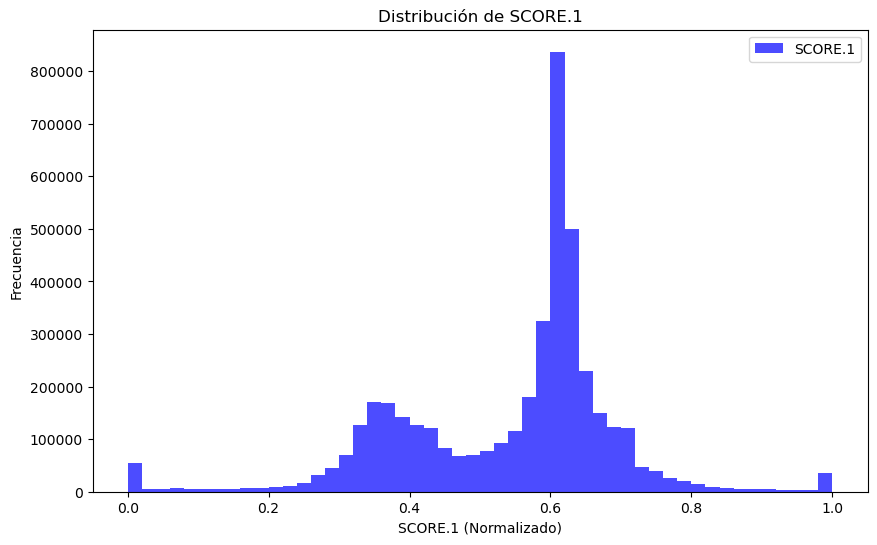

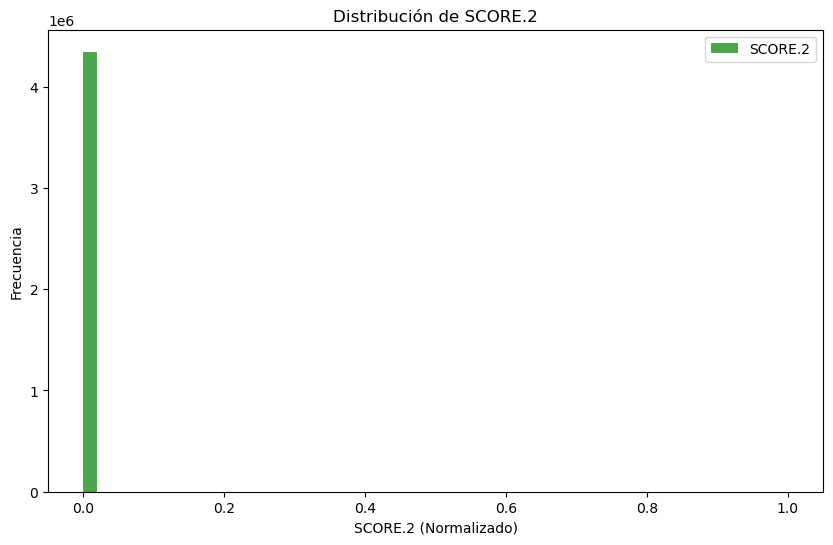

Guardando el archivo refinado...
Archivo refinado guardado en C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/cleaned_block_1_refined.csv


In [11]:
# I must eliminate two columns that do not contribute to the model, I will proceed with the previous script and new approach with pandas.  
# Handling of null values in key columns, treatment of extreme values and normalization
# Generate visualizations for scoree_1 and scoree_2

# Debo eliminar dos columnas que no aportan al modelo, procedere con el script anterior y nuevo enfoque con pandas  
# Manejo de valores nulos en columnas clave, tratamiento de valores extremos y normalizacion
# Genero visualizaciones para scoree_1 y scoree_2


from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

# Global configuration to disable scientific notation on pandas
# Configuración global para deshabilitar notación científica en pandas
pd.options.display.float_format = '{:.30f}'.format

# Path of the file to be processed
# Ruta del archivo a procesar
input_file = r'C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/cleaned_block_1_final.csv'
output_file = r'C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/cleaned_block_1_refined.csv'
correlation_file = r'C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/identifier_id_correlation.csv'

# Read the processed file
# Leer el archivo procesado
print("Cargando archivo para refinamiento...")
data = pd.read_csv(input_file, low_memory=False)

# Step 1: Handling null values in key columns
# Paso 1: Manejo de valores nulos en columnas clave
print("Imputando valores nulos en columnas clave...")
if 'IDENTIFIER_ID' in data.columns:
    try:
        correlation_map = pd.read_csv(correlation_file, index_col=0).to_dict()['IDENTIFIER_ID']
    except FileNotFoundError:
        correlation_map = {}
    
    data['IDENTIFIER_ID'] = data.apply(
        lambda row: correlation_map.get((row['IDENTIFIER_TYPE'], row['OFFICIAL_SYMBOL']), row['IDENTIFIER_ID'])
        if pd.isna(row['IDENTIFIER_ID']) else row['IDENTIFIER_ID'], axis=1
    )
# Step 2: Eliminate redundant columns
# Paso 2: Eliminar columnas redundantes
print("Eliminando columnas redundantes...")
columns_to_drop = ['ORGANISM_ID', '#SCREEN_ID']
data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Step 3: Review and treat outliers in SCORE.1
# Paso 3: Revisar y tratar valores extremos en SCORE.1
print("Verificando y tratando valores extremos en SCORE.1...")
if 'SCORE.1' in data.columns:
    q1 = data['SCORE.1'].quantile(0.25)
    q3 = data['SCORE.1'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data['SCORE.1'] = data['SCORE.1'].clip(lower=lower_bound, upper=upper_bound)

# Step 4: Standardize SCORE.1 and SCORE.2
# Paso 4: Normalizar SCORE.1 y SCORE.2
print("Normalizando SCORE.1 y SCORE.2...")
scaler = MinMaxScaler()

if 'SCORE.1' in data.columns:
    data['SCORE.1'] = scaler.fit_transform(data[['SCORE.1']])

if 'SCORE.2' in data.columns:
    data['SCORE.2'] = pd.to_numeric(data['SCORE.2'], errors='coerce')
    median_score2 = data['SCORE.2'].median()
    data['SCORE.2'].fillna(median_score2, inplace=True)
    data['SCORE.2'] = scaler.fit_transform(data[['SCORE.2']])

# Step 5: Eliminate duplicates based on key columns
# Paso 5: Eliminar duplicados basados en columnas clave
print("Eliminando duplicados basados en columnas clave...")
columns_to_consider = ['IDENTIFIER_ID', 'IDENTIFIER_TYPE', 'OFFICIAL_SYMBOL', 'SCORE.1', 'SCORE.2']
data.drop_duplicates(subset=columns_to_consider, inplace=True)

# Step 6: Eliminate scientific notation and raise precision to 30 digits
# Paso 6: Eliminar notación científica y elevar precisión a 30 dígitos
print("Eliminando notación científica y elevando precisión...")
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    data[col] = data[col].apply(lambda x: round(float(x), 30) if pd.notnull(x) else x)

# Step 7: Validate final integrity
# Paso 7: Validar integridad final
print("Validando integridad de datos...")
data.fillna("UNKNOWN", inplace=True)

# Step 8: Visualizations
# Paso 8: Visualizaciones
print("Generando visualizaciones...")
plt.figure(figsize=(10, 6))
plt.hist(data['SCORE.1'].dropna(), bins=50, alpha=0.7, label='SCORE.1', color='blue')
plt.title('Distribución de SCORE.1')
plt.xlabel('SCORE.1 (Normalizado)')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig('score1_distribution.png')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(data['SCORE.2'].dropna(), bins=50, alpha=0.7, label='SCORE.2', color='green')
plt.title('Distribución de SCORE.2')
plt.xlabel('SCORE.2 (Normalizado)')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig('score2_distribution.png')
plt.show()

# Save refined file with formatting
# Guardar archivo refinado con formato
print("Guardando el archivo refinado...")
data.to_csv(output_file, index=False, float_format='%.30f')  # Guardar sin notación científica y con precisión de 30 dígitos

print(f"Archivo refinado guardado en {output_file}")

In [12]:
# I check with a last report again the file characteristics to make sure everything is ok.
# Reviso con un ultimo reporte nuevamente las caracteristicas del archivo para asegurar que todo este bien

# Path of the file to be analyzed
# Ruta del archivo a analizar
file_to_analyze = r'C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/cleaned_block_1_refined.csv'
report_file = r'C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/cleaned_block_1_report_1_3.txt'

# Read file
# Leer el archivo
print("Cargando el archivo para análisis...")
data = pd.read_csv(file_to_analyze, low_memory=False)

# Initialize report
# Inicializar reporte
report = []

# Step 1: General file information
# Paso 1: Información general del archivo
report.append("=== Información general ===")
report.append(f"Número de filas: {data.shape[0]}")
report.append(f"Número de columnas: {data.shape[1]}")

# Step 2: Data types and columns
# Paso 2: Tipos de datos y columnas
report.append("\n=== Tipos de datos y columnas ===")
report.append(data.dtypes.to_string())

# Step 3: Duplicates
# Paso 3: Duplicados
duplicates_count = data.duplicated().sum()
report.append(f"\n=== Duplicados ===")
report.append(f"Número de duplicados: {duplicates_count}")

# Step 4: Null values
# Paso 4: Valores nulos
null_summary = data.isnull().sum()
columns_with_nulls = null_summary[null_summary > 0]
report.append("\n=== Valores nulos ===")
if not columns_with_nulls.empty:
    report.append(columns_with_nulls.to_string())
else:
    report.append("No hay valores nulos.")

# Step 5: Descriptive statistics
# Paso 5: Estadísticas descriptivas
report.append("\n=== Estadísticas descriptivas ===")
report.append(data.describe(include='all', percentiles=[0.25, 0.5, 0.75]).to_string())

# Step 6: Unique values per column
# Paso 6: Valores únicos por columna
report.append("\n=== Valores únicos por columna ===")
unique_counts = data.nunique()
report.append(unique_counts.to_string())

# Step 7: File size
# Paso 7: Tamaño del archivo
file_size_mb = data.memory_usage(index=True).sum() / (1024 ** 2)
report.append("\n=== Tamaño del archivo ===")
report.append(f"Tamaño en memoria: {file_size_mb:.2f} MB")

# Save report
# Guardar reporte
print("Generando reporte...")
with open(report_file, 'w') as file:
    file.write("\n".join(report))

print(f"Reporte generado y guardado en {report_file}")

Cargando el archivo para análisis...
Generando reporte...
Reporte generado y guardado en C:/Polimeromics/data/BIOGRID-CSV/cleaned_blocks/cleaned_block_1_report_1_3.txt
